# 📢 Penjelasan Isi File
---


Pada tahap ini, saya akan fokus melakukan Exploratory Data Analysis (EDA) dan Preprocessing terhadap data URL dari GitHub [OSF.HOME](https://osf.io/dky2m/) yang diakses 30 Maret 2024

# ✅ **Conclusion**

---


- Data URL **hanya terdapat kategori Non-phishing**

- Data transfer protokol yang dipakai oleh URL Phishing bervariasi dari http dan https

- Tidak terdapat data yang terduplikasi

- Jumlah data dalam kategori Phishing sebanyak 1.500.000

- URL terpendek sekitar 8 dan terpanjang sekitar 6409

- Sebagian besar URL Non-Phishing menggunakan TLD 'com'

- 4 TLD teratas yang sering digunakan dalam URL Non-Phishing adalah  com, org, ru, net, dan de

- 5 domain teratas yang sering digunakan dalam URL Non-Phishing adalah twitter, facebook, youtube, instagram, dan google

- 2 subdomain teratas yang sering digunakan dalam URL Non-Phishing adalah 'www' dan tidak ada subdomain

# 🎯 **Step 0: Import library**
---

In [1]:
!pip -q install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
plt.style.use('seaborn-v0_8')

In [4]:
matplotlib.__version__

'3.7.1'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🎯 **Step 1: Load dataset**
---

In [6]:
path = '/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/URL/osfhome_nonphishing.txt'

with open(path, 'r') as file:
    urls = file.readlines()

urls[:5]

['https://cicig.co/view/k94d7jgn4w3/newest-electric-planer-drive-driving-belt-for-makita-1900?cv=homepage-image\n',
 'https://islamcenter.ru/search.php?city=верхнеуральск&state=74\n',
 'https://toolbarqueries.google.as/url?q=https://cliopsy.fr/wp-content/\n',
 'https://venividi.ru/editors/ekskursii-po-ryazani-top-10-ot-korennogo-ryazanca/#respond\n',
 'https://www.girlznation.com/galleries/cream_sofi_porn_pictures/\n']

In [7]:
cleaned_urls = [url.strip() for url in urls]

cleaned_urls[:5]

['https://cicig.co/view/k94d7jgn4w3/newest-electric-planer-drive-driving-belt-for-makita-1900?cv=homepage-image',
 'https://islamcenter.ru/search.php?city=верхнеуральск&state=74',
 'https://toolbarqueries.google.as/url?q=https://cliopsy.fr/wp-content/',
 'https://venividi.ru/editors/ekskursii-po-ryazani-top-10-ot-korennogo-ryazanca/#respond',
 'https://www.girlznation.com/galleries/cream_sofi_porn_pictures/']

In [8]:
df_url_osf = pd.DataFrame(cleaned_urls, columns=['URL'])

df_url_osf.head()

,URL
0,https://cicig.co/view/k94d7jgn4w3/newest-elect...
1,https://islamcenter.ru/search.php?city=верхнеу...
2,https://toolbarqueries.google.as/url?q=https:/...
3,https://venividi.ru/editors/ekskursii-po-ryaza...
4,https://www.girlznation.com/galleries/cream_so...


In [9]:
df_url_osf['Category'] = 'non-phishing'

df_url_osf.head()

,URL,Category
0,https://cicig.co/view/k94d7jgn4w3/newest-elect...,non-phishing
1,https://islamcenter.ru/search.php?city=верхнеу...,non-phishing
2,https://toolbarqueries.google.as/url?q=https:/...,non-phishing
3,https://venividi.ru/editors/ekskursii-po-ryaza...,non-phishing
4,https://www.girlznation.com/galleries/cream_so...,non-phishing


# 🎯 **Step 2: Check data info**
---

In [10]:
df_url_osf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   URL       1500000 non-null  object
 1   Category  1500000 non-null  object
dtypes: object(2)
memory usage: 22.9+ MB


🚧 Berdasarkan informasi di atas dapat disimpulkan datasetnya tidak terdapat null values


# 🎯 **Step 3: Check duplicate data**
---

## ✨ 3.1 - Check duplicate data

In [11]:
df_url_osf.duplicated().sum()

0

🚧 Berdasarkan informasi di atas tidak adanya data yang terduplikasi

# 🎯 **Step 4: Compare the distribution of the "Category" column.**

---



In [12]:
url_counts = df_url_osf['Category'].value_counts(ascending=True)

url_counts

Category
non-phishing    1500000
Name: count, dtype: int64

<ipython-input-13-6e09ab02d5d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')


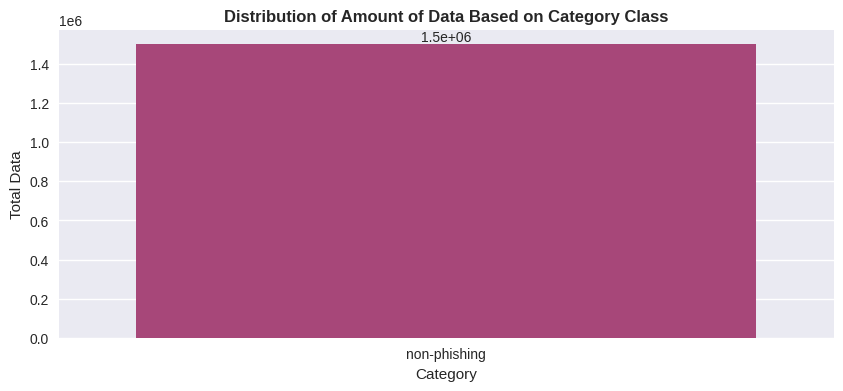

In [13]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Category')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Category Class', fontweight="bold")

plt.show()

# 🎯 **Step 5: Check URL length**

---

In [14]:
df_url_osf['url_length'] = df_url_osf['URL'].apply(len)

## ✨ 5.1 - Barplot

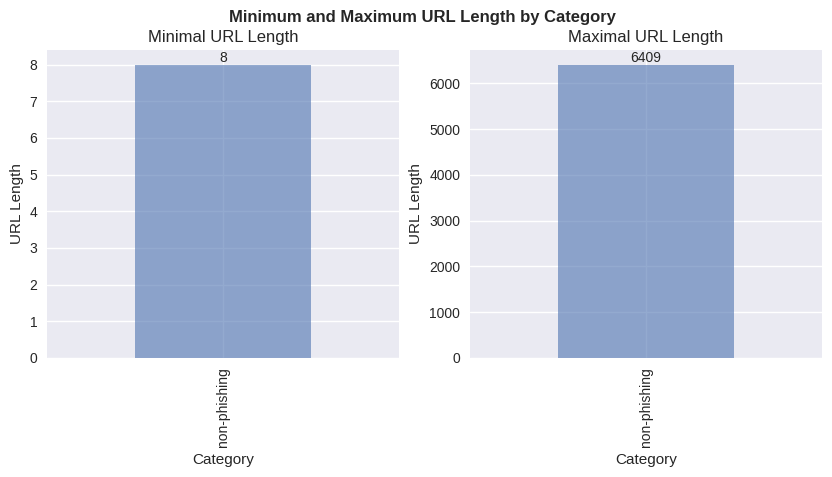

In [15]:
def plot_text_length(df, column, label):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Minimum and Maximum URL Length by Category', fontweight="bold")

    df.groupby(label)[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Minimal URL Length')
    axes[0].set_ylabel('URL Length')
    for p in axes[0].containers:
        axes[0].bar_label(p,)

    df.groupby(label)[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Maximal URL Length')
    axes[1].set_ylabel('URL Length')
    for p in axes[1].containers:
        axes[1].bar_label(p,)

    plt.show()

plot_text_length(df_url_osf, 'url_length', 'Category')

🚧 Berdasarkan grafik di atas dapat diketahui sebagai berikut:
- URL terpendek sekitar 8
- URL terpanjang sekitar 6409

## ✨ 5.2 - Boxplot

<ipython-input-16-6c2fc86980c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category', y='url_length', data=df_url_osf, palette='rocket', whis=3.0)


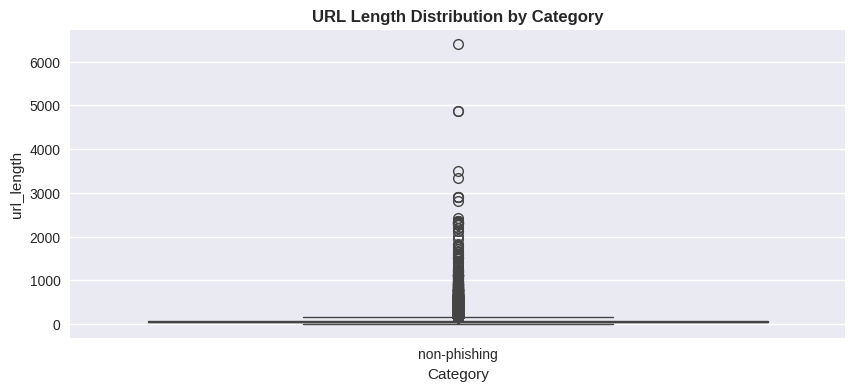

In [16]:
plt.figure(figsize=(10, 4))

ax = sns.boxplot(x='Category', y='url_length', data=df_url_osf, palette='rocket', whis=3.0)

plt.title('URL Length Distribution by Category', fontweight="bold")

plt.show()

In [17]:
df_url_osf.groupby('Category')['url_length'].mean()

Category
non-phishing    59.938559
Name: url_length, dtype: float64

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya rata-rata panjang url kategori Phishing sekitar 60. Selain itu mayoritas panjangnya melebihi dari Q3

# 🎯 **Step 6: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 10 kata teratas yang paling banyak kemunculannya

🔎 Tujuan: tren popularitas dan pola perilaku dalam penggunaan URL.

In [18]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Data': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))  # Ubah ncols menjadi 1

    for plot_info in plot_data:

        sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'], fontweight="bold")

    plt.tight_layout()
    plt.show()

In [19]:
df_nonphishing = df_url_osf[df_url_osf['Category'] == 'non-phishing']

## ✨ 6.1 - Unigram

In [20]:
stop_words = None

n = 10

unigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (1, 1), stop_words, n)

unigram_nonphishing.head()


,Data,Frequency
0,https,1451117
1,com,849448
2,www,835956
3,html,156240
4,de,123289


<ipython-input-18-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


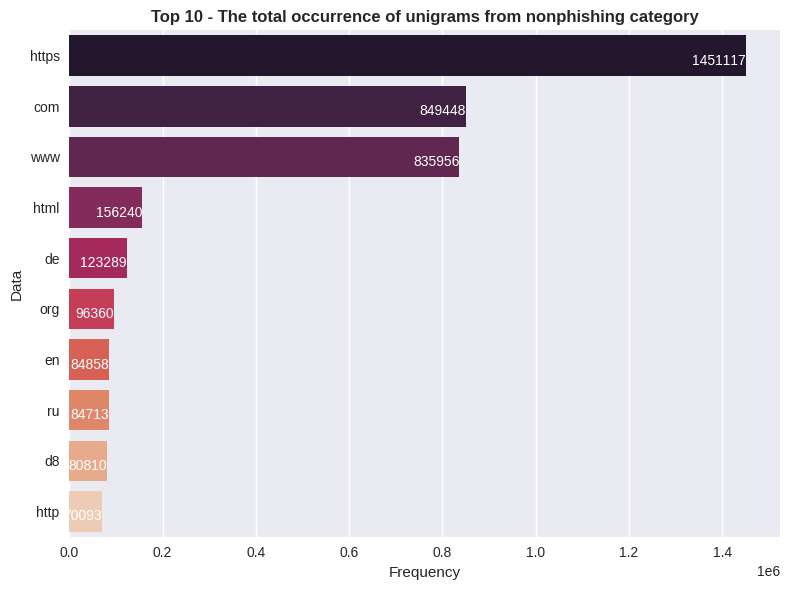

In [21]:
plot_data = [

    {'data': unigram_nonphishing, 'title': 'Top 10 - The total occurrence of unigrams from nonphishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya unigram 'https', 'com' dan 'ww' menempati posisi 3 teratas pada kategori Phishing. Hal ini belom bisa menjadi karakteristik URL Non-phishing karena pada dataset sebelum-sebelumnya terdapat juga URL Phishing yang menggunakan https.

## ✨ 6.2 - Bigram

In [22]:
stop_words = None

n = 10

bigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (2, 2), stop_words, n)

bigram_nonphishing.head()


,Data,Frequency
0,https www,789021
1,http www,33617
2,com en,30041
3,com category,28635
4,d8 a7,21847


<ipython-input-18-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


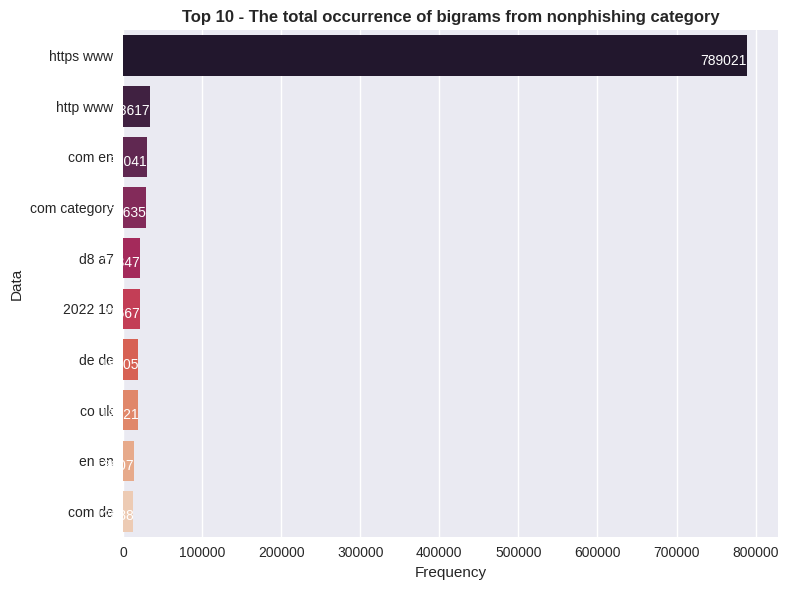

In [23]:
plot_data = [

    {'data': bigram_nonphishing, 'title': 'Top 10 - The total occurrence of bigrams from nonphishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya https masih menjadi mayoritas penggunaan URL Non-phishing


## ✨ 6.3 - Trigram

In [24]:
stop_words = None

n = 10

trigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (3, 3), stop_words, n)

trigram_nonphishing.head()


,Data,Frequency
0,https twitter com,10349
1,d8 a7 d9,10187
2,www facebook com,9941
3,https www facebook,9072
4,d8 a7 d8,8905


<ipython-input-18-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


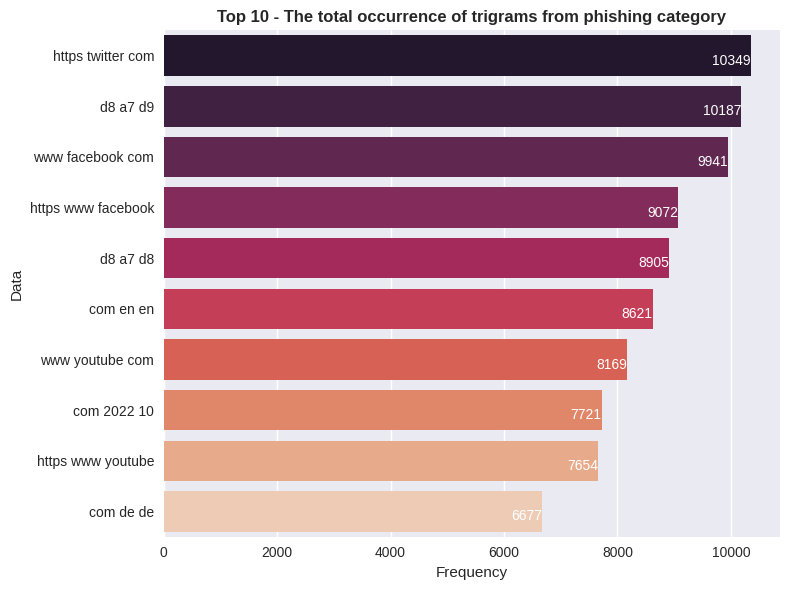

In [25]:
plot_data = [

    {'data': trigram_nonphishing, 'title': 'Top 10 - The total occurrence of trigrams from phishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya mayoritas URL Non-phishing menggunakan https.

# 🎯 **Step 7: Extraction of sub domains, domains and top level domains**

---


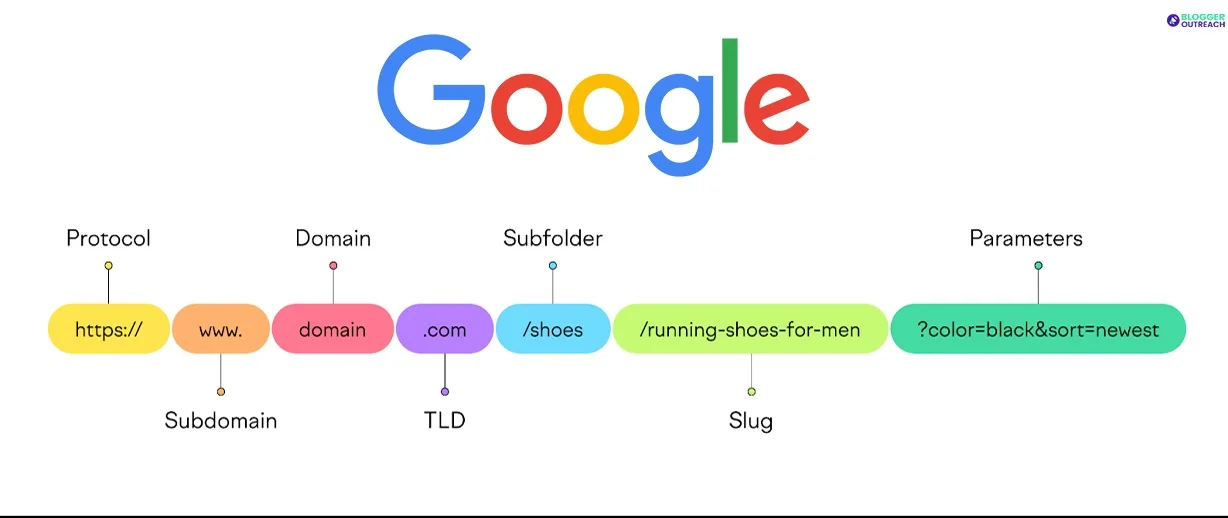

🔎 Saya melakukan ekstraksi subdomain, domain, dan TLD untuk mengetahui distribusi masing-masing dari ketiga tersebut mana yang paling digunakan untuk phishing.

In [26]:
tld_info = df_url_osf['URL'].apply(lambda x: tldextract.extract(x))

df_url_osf['sub_domain'] = tld_info.apply(lambda x: x.subdomain)
df_url_osf['domain'] = tld_info.apply(lambda x: x.domain)
df_url_osf['tld'] = tld_info.apply(lambda x: x.suffix)

df_url_osf.head()

,URL,Category,url_length,sub_domain,domain,tld
0,https://cicig.co/view/k94d7jgn4w3/newest-elect...,non-phishing,109,,cicig,co
1,https://islamcenter.ru/search.php?city=верхнеу...,non-phishing,61,,islamcenter,ru
2,https://toolbarqueries.google.as/url?q=https:/...,non-phishing,69,toolbarqueries,google,as
3,https://venividi.ru/editors/ekskursii-po-ryaza...,non-phishing,86,,venividi,ru
4,https://www.girlznation.com/galleries/cream_so...,non-phishing,63,www,girlznation,com


In [27]:
df_nonphishing = df_url_osf[df_url_osf['Category'] == 'non-phishing']

## ✨ 7.1 - Distribution top level domain

In [33]:
tld_counts_nonphishing = df_nonphishing['tld'].value_counts().reset_index()

tld_counts_nonphishing.head()

,tld,count
0,com,776108
1,org,86623
2,ru,76636
3,net,56707
4,de,51017


In [34]:
tld_counts_nonphishing.rename(columns={'tld': 'Data', 'count':'Frequency'}, inplace=True)

tld_counts_nonphishing.head()

,Data,Frequency
0,com,776108
1,org,86623
2,ru,76636
3,net,56707
4,de,51017


<ipython-input-18-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


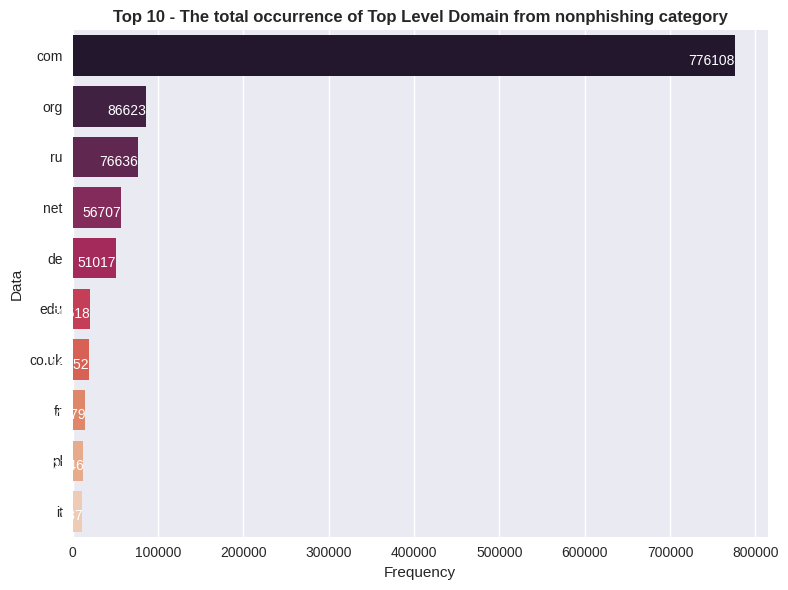

In [35]:
plot_data = [

    {'data': tld_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of Top Level Domain from nonphishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas mayoritas url Non-phishing menggunakan TLD com.

## ✨ 7.2 - Distribution domain

In [36]:
domain_counts_nonphishing = df_nonphishing['domain'].value_counts().reset_index()

domain_counts_nonphishing.head()

,domain,count
0,twitter,11774
1,facebook,10664
2,youtube,8262
3,instagram,6523
4,google,5810


In [37]:
domain_counts_nonphishing.rename(columns={'domain': 'Data', 'count':'Frequency'}, inplace=True)

domain_counts_nonphishing.head()

,Data,Frequency
0,twitter,11774
1,facebook,10664
2,youtube,8262
3,instagram,6523
4,google,5810


<ipython-input-18-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


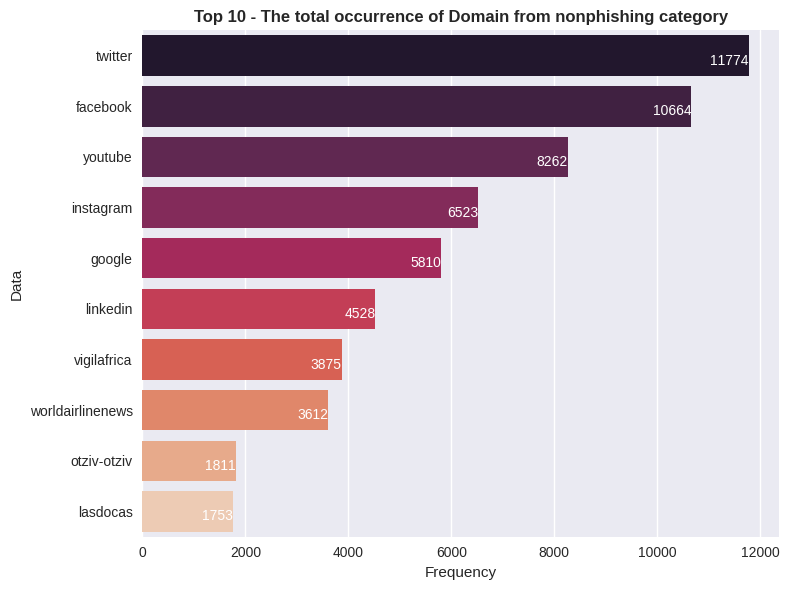

In [38]:
plot_data = [

    {'data': domain_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of Domain from nonphishing category'},

]

plot_to_graph(plot_data)

🚧 Mmm, sungguh menarik bahwasanya URL Non-phishing terdapat domain-domain yang sering diakses setiap hari/

## ✨ 7.3 - Distribution subdomain

In [39]:
subdomain_counts_nonphishing = df_nonphishing['sub_domain'].value_counts().reset_index()

subdomain_counts_nonphishing.head()

,sub_domain,count
0,www,811910
1,,567834
2,de,2124
3,news,2042
4,blog,1924


In [40]:
subdomain_counts_nonphishing.rename(columns={'sub_domain': 'Data', 'count':'Frequency'}, inplace=True)

subdomain_counts_nonphishing.head()

,Data,Frequency
0,www,811910
1,,567834
2,de,2124
3,news,2042
4,blog,1924


<ipython-input-18-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


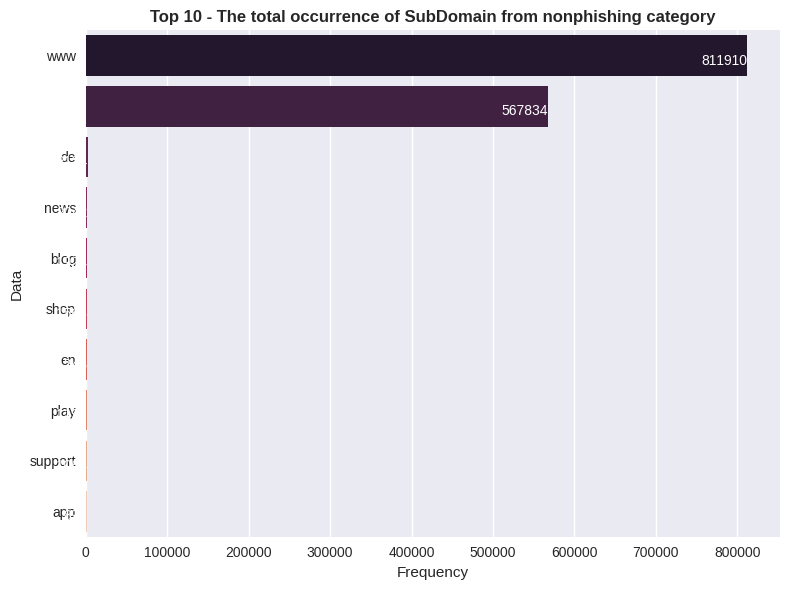

In [41]:
plot_data = [

    {'data': subdomain_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of SubDomain from nonphishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasar hasil grafik di atas terdapat beberapa yang tidak mempunyai subdomain yang menempati posisi teratas sehingga didapatkan informasi kalau URL Non-phishing sebagian tidak memiliki sub domain.

# 🎯 **Step 8: Save data after preprocessing**

---


In [42]:
df_url_osf.head()

,URL,Category,url_length,sub_domain,domain,tld
0,https://cicig.co/view/k94d7jgn4w3/newest-elect...,non-phishing,109,,cicig,co
1,https://islamcenter.ru/search.php?city=верхнеу...,non-phishing,61,,islamcenter,ru
2,https://toolbarqueries.google.as/url?q=https:/...,non-phishing,69,toolbarqueries,google,as
3,https://venividi.ru/editors/ekskursii-po-ryaza...,non-phishing,86,,venividi,ru
4,https://www.girlznation.com/galleries/cream_so...,non-phishing,63,www,girlznation,com


In [43]:
df_url_sample = df_url_osf.sample(n=50000, random_state=42)

In [44]:
df_url_sample.drop(columns=['url_length', 'sub_domain', 'domain', 'tld'], inplace=True)

df_url_sample.head()

,URL,Category
610740,https://skinnyms.com/category/recipes/meal-typ...,non-phishing
233172,https://my.autoscout24.ch/de/fahrzeugbewertung,non-phishing
1149767,https://www.isba.org/cle/path?pathpage=/isba/c...,non-phishing
446241,https://www.viator.com/news,non-phishing
31954,https://www.timberland.de/shop/de/tbl-de/damen...,non-phishing


In [46]:
df_url_sample.to_csv('/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/URL/new_osf.csv', index=False)